# How to use PyWLK

In this tutorial, we will show how to use PyWLK to compute the WL kernel. We will first create two random graphs and then compute the WL kernel between them.

In [1]:
from pywlgk import wlk
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
def visualize_graph(adjacency_matrix, labels):
    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)

    # Set labels for nodes
    node_labels = {i: label for i, label in enumerate(labels)}

    # Draw the graph
    pos = nx.spring_layout(G)  # You can choose a different layout if needed
    nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold', node_size=800, node_color='skyblue',
            font_size=8)

    # Display the graph
    plt.show()

### Random Graph Creation

Create two random adjacency matrices and labels

In [3]:
adjs = np.random.randint(0, 2, size=(2, 10, 10))
adjs = np.array((adjs + adjs.transpose(0, 2, 1)) / 2, dtype=np.int32)
labels = np.ones((2, 10), dtype=np.int32)



Visualize the first graph

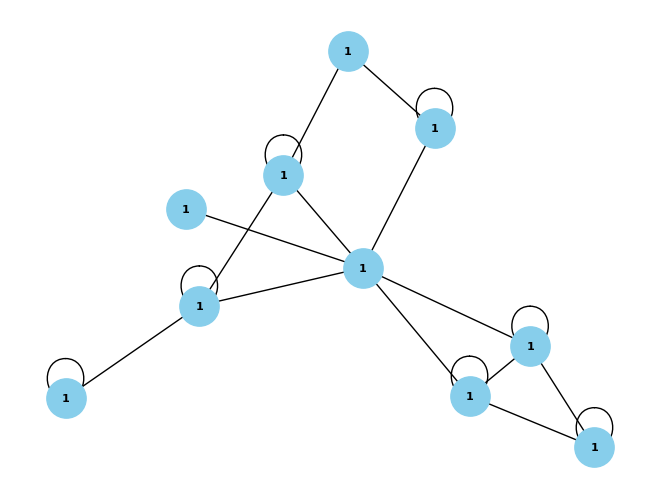

In [4]:
visualize_graph(adjs[0], labels[0])

### How to use PyWLK

Now we can use PyWLK to compute the WL kernel. The two arguments are a list of adjacency matrices and a list of labels. The labels can have any type. The last argument is the number of iterations of the WL algorithm. The default value is 4.


#### Default parameters

We will demonstrate how different parameters affect the output. By default, PyWLK does not normalize the output and uses the dot-product to compute the similarities of graphs.

In [5]:
wlk(adjs, labels, k=4)

array([[164, 117],
       [117, 160]])

#### Normalization

We can normalize the output by setting the `normalize` argument to True. This will normalize the output to the range [0, 1].

In [6]:
wlk(adjs, labels, k=4, normalize=True)

array([[1.        , 0.72227727],
       [0.72227727, 1.        ]])

#### Kernel function

We can also use a different kernel function to compute the similarities of graphs. The kernel function must take a single argument, the counts of labels in the graphs and return a matrix measuring the distance or similarity of the graphs. The default kernel function is the dot-product. We can use the Wasserstein distance as the kernel function by setting the kernel_fn argument to the Wasserstein distance function from SciPy.

It is important to note that this a distance function and not a similarity function. Therefore, the lower the values, the more similar the graphs are.

In [7]:
import scipy.stats as s


def pw_wasserstein(data):
    output = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        for j in range(i, len(data)):
            output[i, j] = s.wasserstein_distance(data[i], data[j])
            output[j, i] = output[i, j]
    return output


wlk(adjs, labels, k=4, kernel_fn=lambda x: pw_wasserstein(x))

array([[0.        , 0.06666667],
       [0.06666667, 0.        ]])